In [2]:
import numpy as np
import pylab as p
from time import time
from dcst import dst, idst
from matplotlib import animation 
from scipy import linalg
from matplotlib import animation           
from IPython.display import display, Image
from IPython.display import HTML
from numpy.fft import fft, ifft
from numba import jit

def init():
    line.set_data([], [])                     
    return line,

def animate(i):
    line.set_data(x, MA[i])
    return line,

8.283760070800781


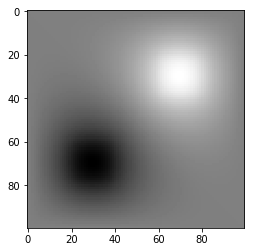

In [26]:
N = 100
a = 1
rho = np.zeros((N,N))
grid = np.zeros((N,N))
rho[20:40][:,60:80] = 1
rho[60:80][:,20:40] = -1
t1 = time()
erro = 1e-6
e = 1
w = 0.9
while np.abs(e) > erro:
    grid1 = np.copy(grid)
    for i in range(1,N-1):
        for j in range(1,N-1):
            grid[i,j] = (1+w)*0.25*(grid[i-1][j] + grid[i+1][j] + grid[i][j-1] + grid[i][j+1]) - w*grid[i][j] + 0.25*rho[i][j]*a**2
    e = np.sum(np.abs(grid)-np.abs(grid1))/(N**2 - 2*5**2 - 400)
    
t2 = time()
print(t2-t1)
p.imshow(grid)
p.gray()
p.show()




3.9000298976898193


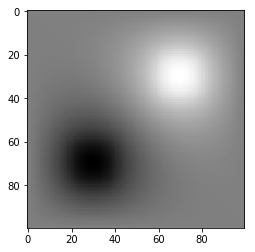

In [27]:
t1 = time()
N = 100
a = 1
rho = np.zeros((N,N))
grid = np.zeros((N,N))
rho[20:40][:,60:80] = 1
rho[60:80][:,20:40] = -1

erro = 1e-6
e = 1
w = 0.9
while np.abs(e) > erro:
    grid1 = np.copy(grid)
    grid[1:N-1][:,1:N-1] = 0.25*(grid1[2:N][:,1:N-1] + grid1[0:N-2][:,1:N-1] + grid1[1:N-1][:,2:N] + grid1[1:N-1][:,0:N-2])
    grid = np.copy(grid + a**2*0.25*rho)
    e = np.sum(np.abs(grid)-np.abs(grid1))/(N**2 - 2*5**2 - 400)
t2 = time()
print(t2 -t1)
p.imshow(grid)
p.gray()
p.show()

In [44]:
a = range(1,15)
a

range(1, 15)

12.34878396987915


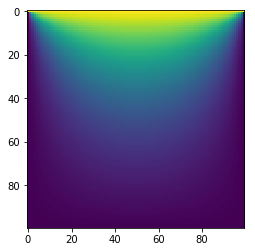

In [2]:
t1 = time()
N = 100
V = 1
grid = np.zeros((N,N))
grid[0] = np.copy(np.ones(N)*V)
erro = 1e-6
e = 1
w = 0.9
while np.abs(e) > erro:
    grid1 = np.copy(grid)
    for i in range(1,N-1):
        for j in range(1,N-1):
            grid[i,j] = (1+w)*0.25*(grid[i-1][j] + grid[i+1][j] + grid[i][j-1] + grid[i][j+1]) - w*grid[i,j]
    e = np.sum(grid-grid1)/N**2
t2 = time()
print(t2-t1)
p.imshow(grid)
p.show()

1.643280029296875


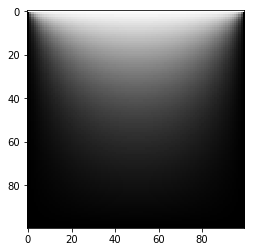

In [25]:
t1 = time()
N = 100
V = 1
grid = np.zeros((N,N))
grid[0] = np.copy(np.ones(N)*V)
erro = 1e-6
e = 1
w = 0
while np.abs(e) > erro:
    grid1 = np.copy(grid)
    grid[1:N-1][:,1:N-1] = 0.25*(w+1)*(grid1[2:N][:,1:N-1] + grid1[0:N-2][:,1:N-1] + grid1[1:N-1][:,2:N] + grid1[1:N-1][:,0:N-2]) - w*grid1[1:N-1][:,1:N-1] 
    e = np.sum(grid-grid1)/N**2
t2 = time()
print(t2-t1)
p.imshow(grid)
p.show()

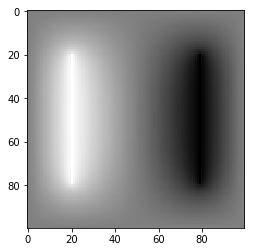

In [23]:
N = 100
a = 10
grid = np.zeros((N,N))
grid[20:80][:,20] = 1
grid[20:80][:,79] = -1
erro = 1e-6
e = 1
w = 0.9
while np.abs(e) > erro:
    grid1 = np.copy(grid)
    for i in range(1,N-1):
        for j in range(1,N-1):
            if i not in np.arange(20,80) or j not in [20,79]:
                grid[i,j] = (1+w)*0.25*(grid[i-1][j] + grid[i+1][j] + grid[i][j-1] + grid[i][j+1]) - w*grid[i][j]
    e = np.sum(np.abs(grid)-np.abs(grid1))/(N**2 - 400 - 2*60)
p.imshow(grid)
p.gray()
p.show() 

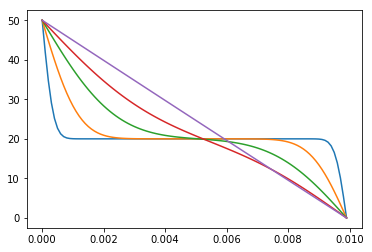

In [14]:
N = 100
L = 0.01
a = L/100
D =4.25e-6
x = np.arange(0,L,a)
steel = np.ones(N) * 20
steel[0] = 50
steel[-1] = 0
h = 1e-6
t = 0
for i in [0.01,0.1,0.4,1,10]:
    while t < i:
        steel2 = np.copy(steel)
        steel[1:N-1] = steel2[1:N-1] + h*D/a**2*(steel2[2:N] + steel2[0:N-2] -2*steel2[1:N-1])
        t += h
    p.plot(x,steel)
p.show()

## Método da relaxação para eq diferenciais 

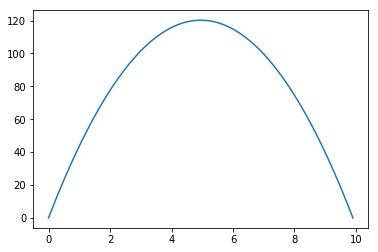

In [33]:
N = 100
L = 10
g = 9.81
h = L/N
grid = np.zeros(N)
t = np.arange(0,L,h)
e = 1 
erro = 1e-6
while np.abs(e) > erro:
    grid1 = np.copy(grid)
    grid[1:N-1] = g/2*h**2 + 0.5*(grid1[0:N-2] + grid1[2:N])
    e = np.sum(np.abs(grid-grid1))/(N-2)
p.plot(t,grid)
p.show()

## eq de schrodinger com Crank-Nicolson

In [2]:

def thomas(trid,s):
    matriz = np.copy(trid)
    v = np.copy(s)
    for i in range(len(matriz)-1):
        a = matriz[i][i]
        v[i] /= a
        matriz[i] /= a
        b =matriz[i+1][i]
        v[i+1] -= v[i]*b
        matriz[i+1] -= matriz[i]*b
    a = matriz[-1][-1]
    v[-1] /= a
    matriz[-1] /= a
    sol = np.zeros(len(trid))
    for i in range(1,len(trid)+1):
        if i == 0:
            sol[-i] = v[-i]
        else:
            sol[-i] = v[-i] - sol[-i+1]*matriz[-i][-i+1]
    return sol

def matriz(N,a1,a2,b = 0, c = 0):
    if b == 0:
        b = a1
        
    A = np.zeros((N,N),complex)
    for i in range(1,N-1):
        A[i][i] = a1
        A[i][i-1] = a2
        A[i][i+1] = a2
    A[N-1][0] = c
    A[0][N-2] = c    
    A[0][0] = a1
    A[N-1][N-1] = b
    A[0][1] = a2
    A[N-1][N-2] = a2
    return A

def crank(grid,x,temp,N1,L,h):
    a = L/N1
    N = N1-2
    s = 1.0546e-34*1j
    m = 9.109e-31
    A = np.zeros((N,N),complex)
    b1 = 1-h*s/(2*m*a**2)
    b2 = h*s/(4*m*a**2)
    a1 = 1+h*s/(2*m*a**2)
    a2 = -h*s/(4*m*a**2)
    A = matriz(N,a1,a2)
    B = matriz(N,b1,b2)
    v = np.zeros(N,complex)
    t = 0
    for T in temp:
        while t < T:
            v = np.dot(B,grid[1:-1])
            grid[1:-1]= np.copy(np.linalg.solve(A,v))
            t += h
        p.plot(x,np.abs(grid))
            
            
    
    

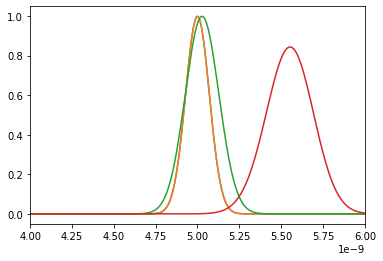

In [19]:
N1 = 1000
N = N1 -2 
h = 1e-18
L = 1e-8
a = L/N1
m = 9.109e-31
x0 = L/2
k = 5e10
sigma = 1e-10
x = np.linspace(0,L,N1)
grid = np.exp(-(x-x0)**2/(2*sigma**2))*np.exp(k*1j*x)
p.plot(x,np.abs(grid)**2)
crank(grid,x,[5e-18,1e-16],N1,L,h)
p.xlim(0.4e-8,0.6e-8)
p.show()


In [35]:
def crank(grid,x,temp,h):
    N1 = len(x)
    L = x[-1]
    a = L/N1
    N = N1-2
    N2 = len(temp)
    N3 = int(temp[-1]/h)
    s = 1.0546e-34*1j
    m = 9.109e-31
    A = np.zeros((N,N),complex)
    B = np.zeros((N,N),complex)
    b1 = 1-h*s/(2*m*a**2)
    b2 = h*s/(4*m*a**2)
    a1 = 1+h*s/(2*m*a**2)
    a2 = -h*s/(4*m*a**2)
    A = np.copy(matriz(N,a1,a2))
    B = np.copy(matriz(N,b1,b2))
    Ai = np.linalg.inv(A)
    
    v = np.zeros(N,complex)
    MA = np.zeros((N2,N1),complex)
    t = 0
    for i in range(N2):
        #for j in range(int(N3/N2)):
        while t < temp[i]:
            v = np.dot(B,grid[1:-1])
            grid[1:-1]= np.copy(np.dot(Ai,v))
            t += h
        MA[i] = np.copy(grid)
    return MA

In [64]:
N1 = 1000
N = N1 -2 
h = 1e-18
L = 1e-8
a = L/N1
m = 9.109e-31
x0 = L/2
k = 5e10
sigma = 1e-10
x = np.linspace(0,L,N1)
temp = np.linspace(0,1.2e-15,100)
grid = np.exp(-(x-x0)**2/(2*sigma**2))*np.exp(k*1j*x)
p.plot(x,np.real(grid))

MA = np.real(crank(grid,x,temp,h))

In [65]:
fig, ax = p.subplots(figsize=(10,5)) 
line, = ax.plot([], []) 
ax.set_ylim(-2,2)
ax.set_xlim(0,x[-1])
fr = len(MA[:,0])
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=fr-1, interval=20,blit=True)
p.close(anim._fig)
HTML(anim.to_html5_video())

### eq de schrodinger usando métodos espetrais


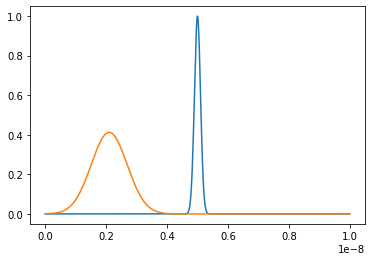

In [80]:
N = 1000
h = 1e-18
L = 1e-8
a = L/N
m = 9.109e-31
x0 = L/2
K = 5e10
sigma = 1e-10
t = 5e-16
k = np.arange(0,N,1)
x = np.linspace(0,L,N)
R = np.exp(-(x-x0)**2/(2*sigma**2))*np.cos(K*x)
I = np.exp(-(x-x0)**2/(2*sigma**2))*np.sin(K*x)
p.plot(x,np.abs(R+1j*I))
R1 = dst(R)
I1 = dst(I)
COS = np.cos(np.pi**2*1.0546e-34*k**2*t/(2*m*L**2))
SIN = np.sin(np.pi**2*1.0546e-34*k**2*t/(2*m*L**2))

A = R1*COS-I1*SIN
B = R1*SIN+I1*COS
grid1=idst(A)
grid2 =idst(B)
p.plot(x,np.abs(grid1 + 1j*grid2))

p.show()

In [18]:
N = 100
L = 20
a = L/N
D =0.1
x = np.linspace(0,L,N)
crust = np.ones(N) * 10
A = 10
B = 12
T = 365
crust[-1] = 11
p.plot(x,crust)
h = 0.1
t = -h
temp = np.linspace(0,11*365.25,300)
MA=np.zeros((len(temp),N),float)
for i in range(len(temp)):
    while t < temp[i]:
        t += h
        crust[0] = A + B*np.sin(2*np.pi*t/T)
        crust[1:-1] = np.copy(crust[1:-1] + h*D/a**2*(crust[2:] + crust[0:-2] -2*crust[1:-1]))
    MA[i] = np.copy(crust)    
        

In [19]:
fig, ax = p.subplots(figsize=(10,5)) 
line, = ax.plot([], []) 
ax.set_ylim(-5,25)
ax.set_xlim(0,x[-1])
fr = len(MA[:,0])
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=fr-1, interval=20,blit=True)
p.close(anim._fig)
HTML(anim.to_html5_video())

[  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
[ 0  4  8 12 16 20 24 28 32 36 40]


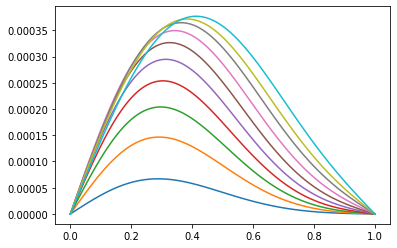

In [37]:
L = 1
N = 100
a = L/N
h = 1e-4
sigma = 0.3
d = 0.1
v = 100
x = np.linspace(0,L,N)
psi = np.zeros(N,float)
phi = x*(L-x)/L**2*np.exp(-(x-d)**2/(2*sigma**2))
p.show()
temp = np.linspace(4,40,10)
print(temp)
print(np.arange(0,44,4))
t = 0
for i in temp:
    while t < i:
        phi[1:-1] = np.copy(h*v**2/a**2*(psi[2:] + psi[:-2] -2*psi[1:-1]) + phi[1:-1])
        psi[1:-1] = np.copy(psi[1:-1] + h*phi[1:-1])
        t += h
    p.plot(x,psi, label= str(i))
p.show()

In [15]:
@jit
def vec_kuta4(t,x0):
    N = len(t)
    h = (t[-1]-t[0])/N
    x = np.zeros( (N,len(x0) ),float)
    x[0] = np.copy(x0)
    for i in range(N-1):
        k1 = np.copy(h*f(x[i],t[i]))
        k2 = np.copy(h*f(x[i] + k1/2,t[i] + h/2))
        k3 = np.copy(h*f(x[i] + k2/2,t[i] + h/2)) 
        k4 = np.copy(h*f(x[i] + k3,t[i] + h))
        x[i+1]= np.copy(x[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
    return x

In [16]:

@jit
def f(r,t):
    G = 66374.2
    M = 1.989e30
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    a = np.sqrt(x**2 + y**2)
    f1 = vx
    
    f2 = -G*M*x/(a**3)
    
    f3 = vy
    
    f4 = -G*M*y/(a**3)
    
    
    
    
    
    return np.array([f1,f2,f3,f4],float)



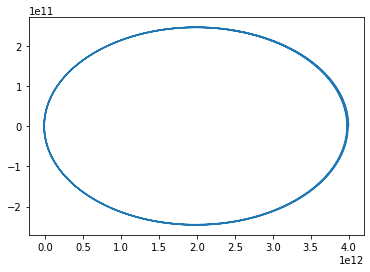

In [17]:
G = 66374.2
M = 1.989e30
t = np.linspace(0,165,200000)
x0 = np.array([4e12,0,0,15768000000],float)
data = np.copy(vec_kuta4(t,x0))
p.plot(data[:,0],data[:,2])
p.show()

In [11]:

def f(r,t):
    G = 66374.2
    M = 1.989e30
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    a = np.sqrt(x**2 + y**2)
    f1 = vx
    
    f2 = -G*M*x/(a**3)
    
    f3 = vy
    
    f4 = -G*M*y/(a**3)
    return np.array([f1,f2,f3,f4],float)

def kuta_aux(t,x,h):
    k1 = h*f(x,t)
    k2 = h*f(x + k1/2,t + h/2)
    k3 = h*f(x + k2/2,t + h/2)
    k4 = h*f(x + k3,t + h)
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

def vec_adapt_kuta(x0,a,b,e,h):
    h1 = h
    temp = [a]
    x =[float(x0[0])]
    y = [float(x0[2])]
    r = np.copy(x0)
    t = a
    while t < b:
        x1 = np.copy(r)
        x2 = np.copy(kuta_aux(t,x1,2*h1))
        for j in range(2):
            x1 = np.copy(kuta_aux(t + j*h1,x1,h1))
        Ex = 1/30*(x1[0]-x2[0])
        Ey = 1/30*(x1[2]-x2[2])
        rho = h1*e/(np.sqrt(Ex**2 + Ey**2 ))                   #MUDAR O ERRO NESTA LINHA CONFORME O PEDIDO
        if rho > 1.:
            r = np.copy(x1)
            t += 2*h1
            x.append(x1[0])
            y.append(x1[2])
        h1 = min(h1*rho**0.25,2*h1)
    return np.array([x,y],float)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


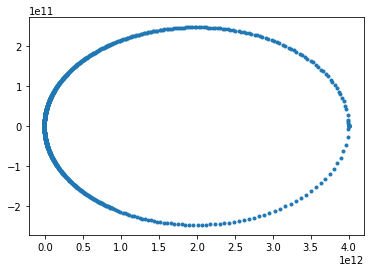

In [12]:
G = 66374.2
M = 1.989e30
x0 = np.array([4e12,0,0,15768000000],float)
data1 = vec_adapt_kuta(x0,0,75,1000,165/200000)
p.plot(data1[0],data1[1],'.')
p.show()